## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


import warnings
warnings.filterwarnings("ignore")

# Set all options
%matplotlib inline
plt.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (20, 3)
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(context="paper", font="monospace")

### User defined functions

In [2]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, unique numbers, datatypes etc.
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total', 'Percent','Nunique', 'Dtype'])
    display(quality_df)


def object_count_plot(df):
    """
    Description : Plot countplot for all categorical features present in the dataframe passed
    Argument : Dataframe
    """
    
    for var in df.columns:
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()
            
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features in the dataframe passed
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

### Importing data

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sub = pd.read_csv('sample_submission.csv')

In [4]:
train.set_index('user_id', inplace = True)
test.set_index('user_id',inplace=True)

In [5]:
print("Shape of train = ",train.shape)
print("Shape of test = ",test.shape)
print("Shape of Sample sub = ",sub.shape)

Shape of train =  (400000, 18)
Shape of test =  (100000, 17)
Shape of Sample sub =  (100000, 2)


In [6]:
train.sample(5)

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
user_id,,,,,,,,,,,,,,,,,,
bf52af44badaebc4a4166ad90be11306d772421c,NaN,K > 24 month,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NO,13,NaN,nan,0
b7d385fc222479154a718b15fdfcc70727f623b4,NaN,K > 24 month,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NO,1,NaN,nan,1
423e519e070f0ddcd81a0fe8cb7c09abd02f0ece,DAKAR,I 18-21 month,"5,300.0000",5.0000,"5,286.0000","1,762.0000",7.0000,"11,517.0000",nan,21.0000,nan,nan,1.0000,NO,50,"Data:1000F=2GB,30d",5.0000,0
a65f674359dfd81432ea7f196c838cce6b68caf0,NaN,I 18-21 month,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NO,1,NaN,nan,1
7d21b413c9df10d51a188dee9aa179cde96ccfca,TAMBACOUNDA,K > 24 month,"3,500.0000",7.0000,"3,500.0000","1,167.0000",7.0000,0.0000,52.0000,96.0000,nan,nan,nan,NO,27,All-net 500F =2000F_AllNet_Unlimited,5.0000,0


### Checking target distribution

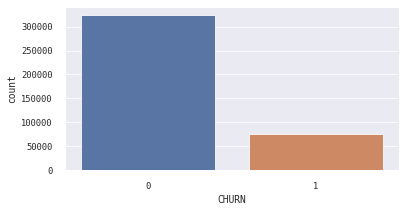

In [7]:
plt.figure(figsize=(6,3))
sns.countplot(x='CHURN',data=train)
plt.show()

In [8]:
# Percentage Churn
train['CHURN'].value_counts(normalize = True) * 100

0                81.2890
1                18.7110
Name: CHURN, dtype: float64

In [9]:
# Checking the attribute names
train.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [10]:
# description = pd.read_csv('VariableDefinitions.csv')
# description

### Checking Data Quality

In [11]:
# checking missing data
quality_report(train)

,Total,Percent,Nunique,Dtype
ZONE2,374487,93.6218,255,float64
ZONE1,368310,92.0775,319,float64
TIGO,239386,59.8465,805,float64
DATA_VOLUME,196854,49.2135,22229,float64
TOP_PACK,167329,41.8323,111,object
FREQ_TOP_PACK,167329,41.8323,170,float64
ORANGE,166317,41.5793,2072,float64
REGION,157520,39.3800,14,object
ON_NET,145819,36.4548,5996,float64
FREQUENCE_RECH,140277,35.0693,111,float64


* ```MRG``` contains only a single unique value
* A significant percentage of the data contains missing values, Dropping them will make us lose significant information 
* The percetage of ```ZONE1``` and ```ZONE2``` is way too much, We should probably drop it.

In [12]:
train['MRG'].value_counts()

NO    400000
Name: MRG, dtype: int64

In [13]:
train.drop(['ZONE1', 'ZONE2','MRG'], axis = 1, inplace = True)
test.drop(['ZONE1', 'ZONE2', 'MRG'], axis = 1, inplace = True)

### Missing Value Treatment

* filling missing values in numneric features with their median (median is more resistant to outliers) 
* missing values in Categorical features will be treated as different category

In [14]:
test['CHURN'] = 'test' #for easy separation

# Combine train and test to avoid repetition
data = pd.concat([train, test]).reset_index(drop=True)

In [15]:
data.shape, train.shape, test.shape

((500000, 15), (400000, 15), (100000, 15))

In [16]:
missing_col = data.columns[data.isna().any()]

In [17]:
missing_col

Index(['REGION', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'TOP_PACK',
       'FREQ_TOP_PACK'],
      dtype='object')

In [18]:
# filling NaN values in numeric features
for col in missing_col.drop(['REGION', 'TOP_PACK']):
    
    data[col].fillna(data[col].median(), inplace = True)

In [19]:
# filling NaN values in numeric features
for col in [ 'TOP_PACK', 'REGION']:
    
    data[col].fillna(col+'_NAN',inplace = True)

In [20]:
data.isna().sum()

REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

## Quick EDA

### Count plot

DAKAR          95517
THIES          33374
SAINT-LOUIS    22125
LOUGA          18513
KAOLACK        18042
DIOURBEL       12576
TAMBACOUNDA    10273
KAFFRINE        8181
KOLDA           7204
FATICK          6638
MATAM           5255
ZIGUINCHOR      4012
SEDHIOU          589
KEDOUGOU         181
Name: REGION, dtype: int64


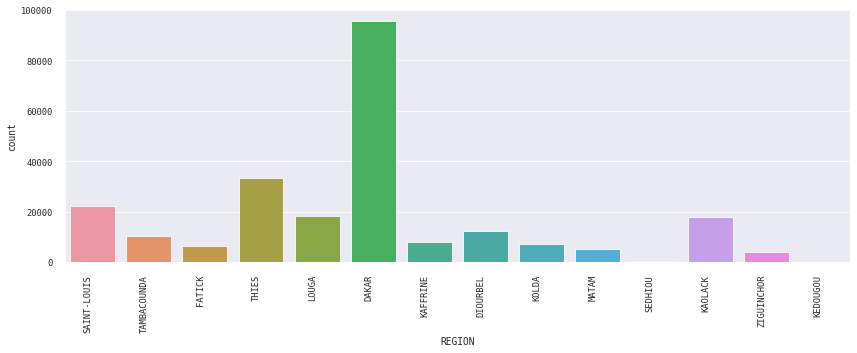

K > 24 month     379439
I 18-21 month      8312
H 15-18 month      4858
G 12-15 month      2788
J 21-24 month      2325
F 9-12 month       1771
E 6-9 month         359
D 3-6 month         148
Name: TENURE, dtype: int64


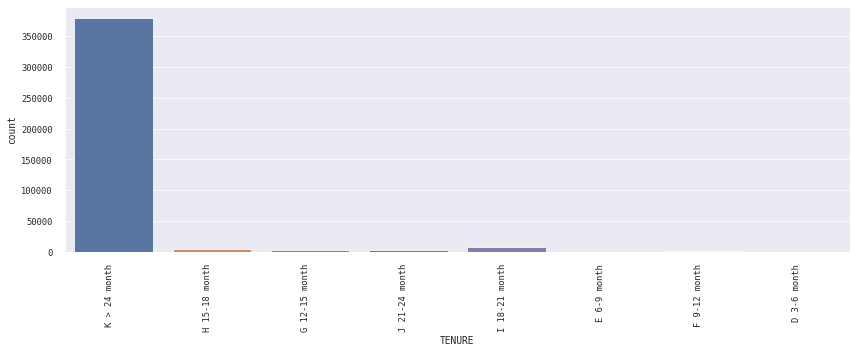

In [21]:
object_count_plot(train.drop('TOP_PACK', axis = 1))

### Distribution Plot

count           259,723.0000
mean              5,522.9713
std               7,099.6406
min                  20.0000
25%               1,000.0000
50%               3,000.0000
75%               7,300.0000
max             226,550.0000
Name: MONTANT, dtype: float64


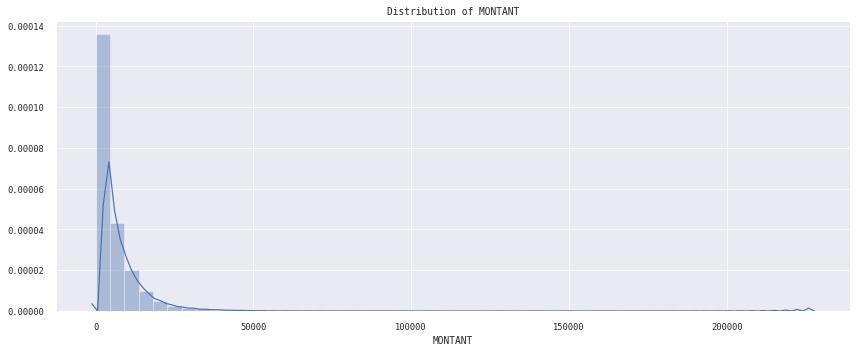

count           259,723.0000
mean                 11.5037
std                  13.2755
min                   1.0000
25%                   2.0000
50%                   6.0000
75%                  15.0000
max                 133.0000
Name: FREQUENCE_RECH, dtype: float64


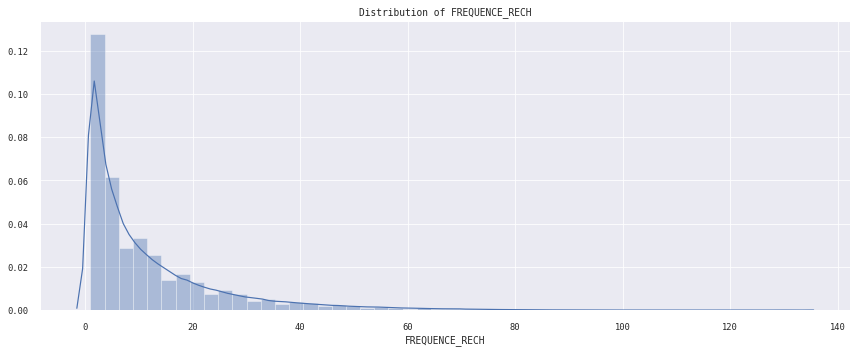

count           265,337.0000
mean              5,505.4878
std               7,175.8024
min                   1.0000
25%               1,000.0000
50%               3,000.0000
75%               7,340.0000
max             233,413.0000
Name: REVENUE, dtype: float64


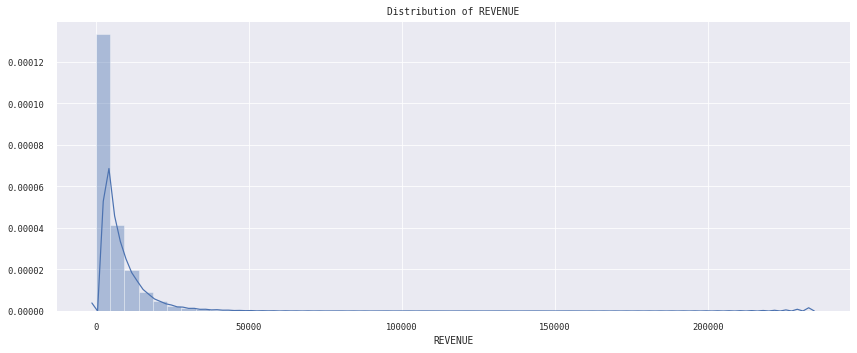

count           265,337.0000
mean              1,835.1677
std               2,391.9293
min                   0.0000
25%                 333.0000
50%               1,000.0000
75%               2,447.0000
max              77,804.0000
Name: ARPU_SEGMENT, dtype: float64


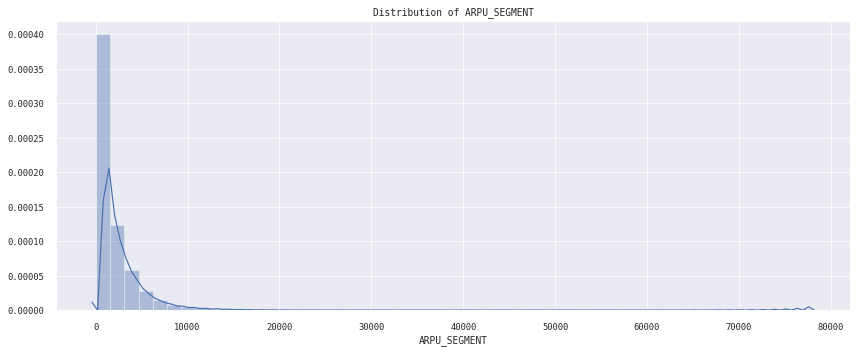

count           265,337.0000
mean                 13.9518
std                  14.6799
min                   1.0000
25%                   3.0000
50%                   9.0000
75%                  19.0000
max                  91.0000
Name: FREQUENCE, dtype: float64


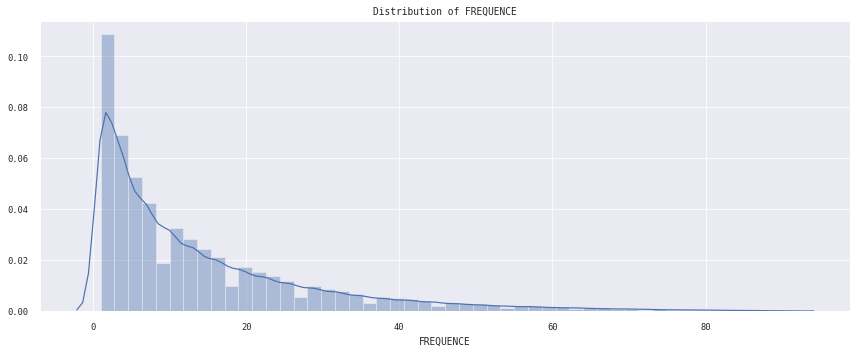

count           203,146.0000
mean              3,369.7634
std              12,281.8675
min                   0.0000
25%                   0.0000
50%                 267.0000
75%               2,925.0000
max             934,576.0000
Name: DATA_VOLUME, dtype: float64


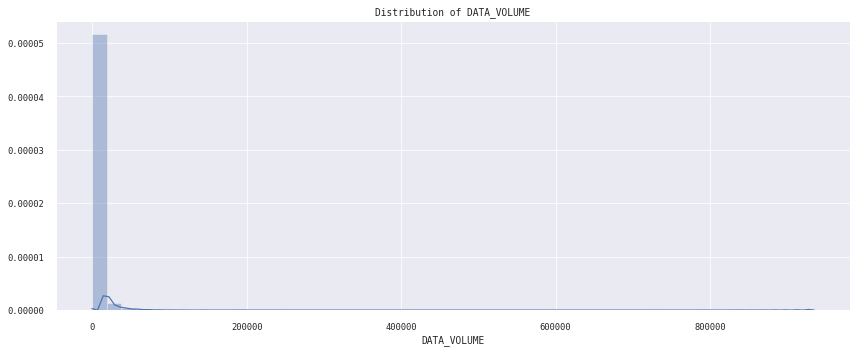

count           254,181.0000
mean                275.9176
std                 873.5930
min                   0.0000
25%                   5.0000
50%                  27.0000
75%                 155.0000
max              45,011.0000
Name: ON_NET, dtype: float64


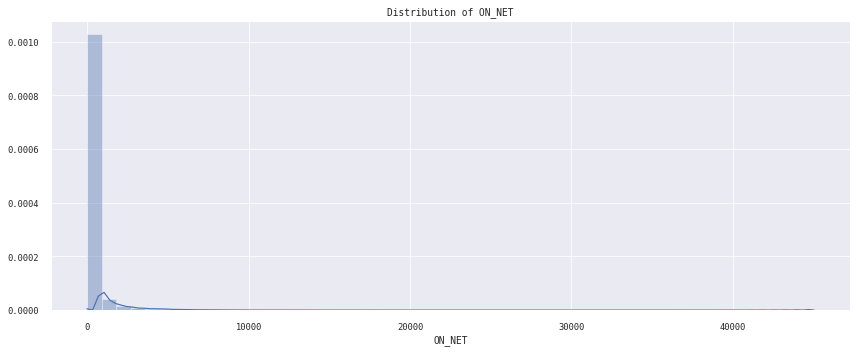

count           233,683.0000
mean                 95.5329
std                 204.7333
min                   0.0000
25%                   7.0000
50%                  29.0000
75%                  99.0000
max               6,788.0000
Name: ORANGE, dtype: float64


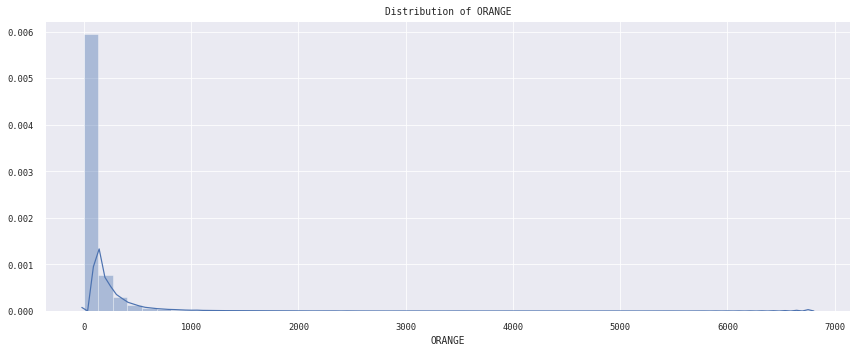

count           160,614.0000
mean                 23.1346
std                  63.0619
min                   0.0000
25%                   2.0000
50%                   6.0000
75%                  20.0000
max               2,758.0000
Name: TIGO, dtype: float64


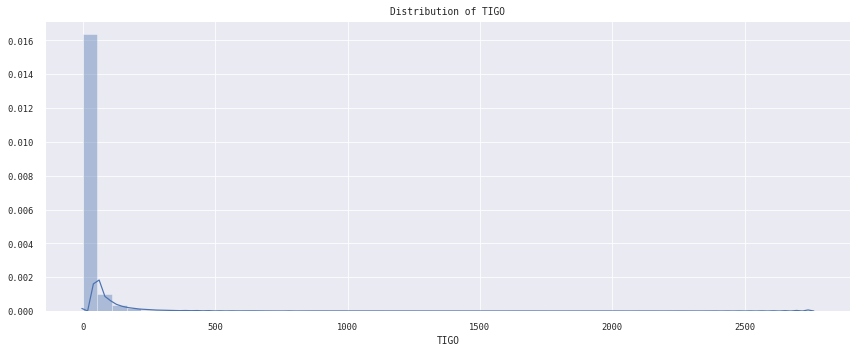

count           400,000.0000
mean                 28.0465
std                  22.2828
min                   1.0000
25%                   6.0000
50%                  24.0000
75%                  51.0000
max                  62.0000
Name: REGULARITY, dtype: float64


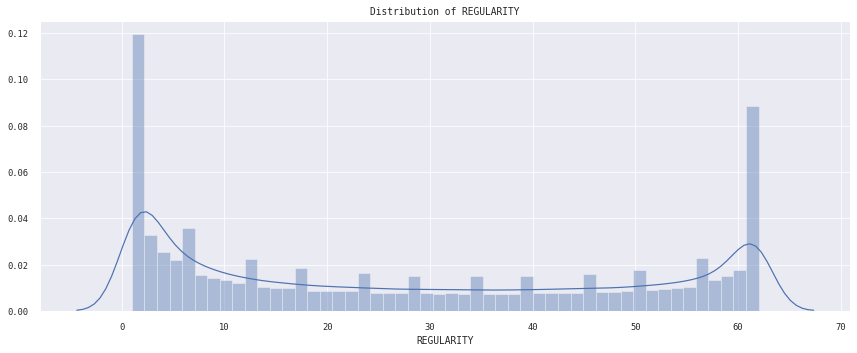

count           232,671.0000
mean                  9.2542
std                  12.3056
min                   1.0000
25%                   2.0000
50%                   5.0000
75%                  12.0000
max                 629.0000
Name: FREQ_TOP_PACK, dtype: float64


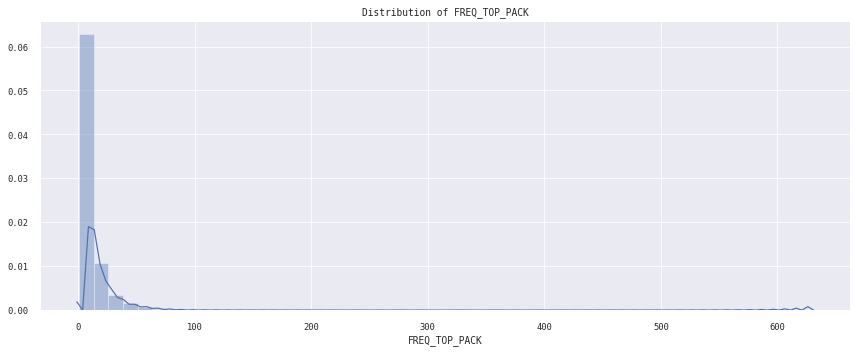

In [22]:
numeric_distribution_plot(train.drop('CHURN', axis=1))

### Checking for Outliers

In [47]:
# num_features = train.select_dtypes(include=np.number).columns
# for col in num_features.drop('CHURN'):
#     sns.boxplot(col, data=train)
#     plt.xlabel(col) # Set text for the x axisa

#     plt.show()

### Summary

* Most of the customers are based in the DAKAR Region
* Majority of the customers have spents over 2 years with the service provider i.e expresso
* Almost all numeric features are heavily skewed to the left, hence we may need to normalise them

## Feature transformation and Data preparation

In [23]:
from scipy.stats import skew,norm  # for some statistics

In [24]:
numeric = data.select_dtypes(include='number').columns
skew_features = data[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 10 numerical features with Skew > 0.5 :


DATA_VOLUME                   35.8214
TIGO                          18.4773
ON_NET                        10.3886
ORANGE                         9.2925
FREQ_TOP_PACK                  5.6730
MONTANT                        4.9914
ARPU_SEGMENT                   4.6683
REVENUE                        4.6683
FREQUENCE_RECH                 2.8955
FREQUENCE                      2.4513
dtype: float64

### Lets take a look at some skewed features before and after log transformation

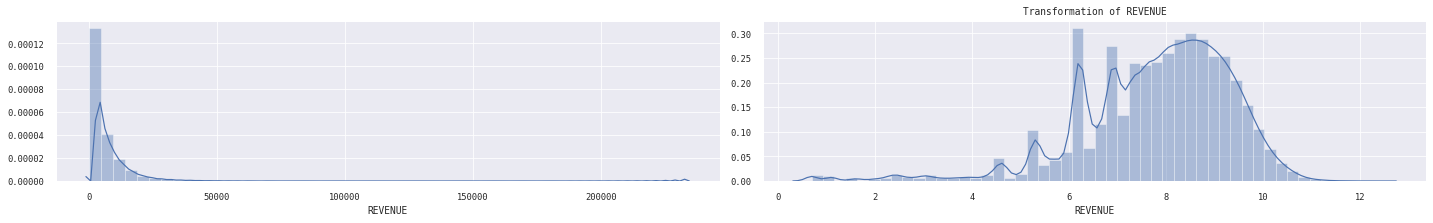

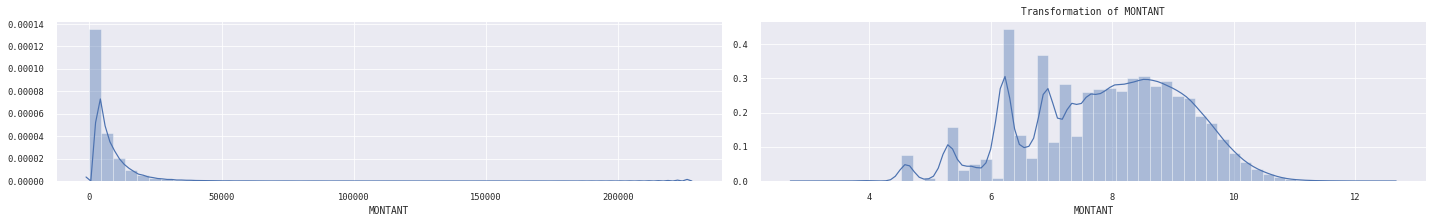

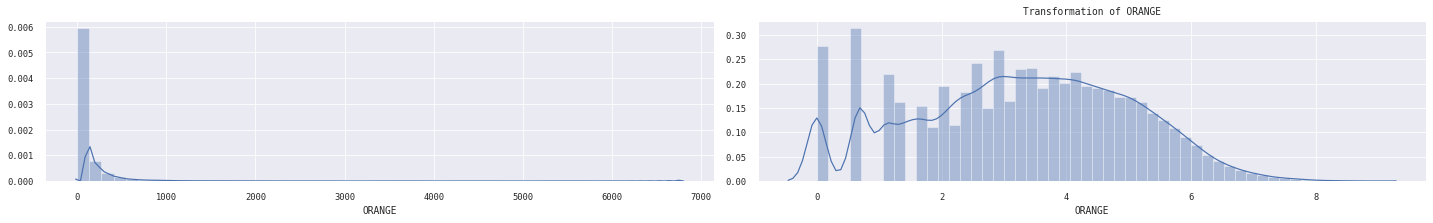

In [25]:
for col in ['REVENUE', 'MONTANT', 'ORANGE']:
    fig, ax = plt.subplots(1,2)

    #plot of normal feature on the first axis
    sns.distplot(train[col], ax=ax[0])

    #Transform the feature and plot on the second axis
    sns.distplot(np.log1p(train[col]), ax=ax[1])

    plt.tight_layout()
    plt.title("Transformation of {}".format(col))

In [26]:
# Normalize skewed features using log transformation
for column in skew_index:
    data[column] = np.log1p(data[column])

### Encoding Categorical features

In [27]:
cat_features = data.select_dtypes(exclude=np.number).columns.drop('CHURN')

In [28]:
cat_features

Index(['REGION', 'TENURE', 'TOP_PACK'], dtype='object')

In [29]:
for col in cat_features:
    print('{} has {} unique categories'.format(col, data[col].nunique()))

REGION has 15 unique categories
TENURE has 8 unique categories
TOP_PACK has 113 unique categories


* We can One hot encode ```REGION``` and ```TENURE``` then Label Encode ```TOP_PACK```

In [30]:
data = pd.get_dummies(columns= ['REGION', 'TENURE'], data = data)

In [31]:
data.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,REGION_DAKAR,REGION_DIOURBEL,REGION_FATICK,REGION_KAFFRINE,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_REGION_NAN,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TENURE_D 3-6 month,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,9.7410,3.4965,9.7982,8.6997,3.5553,5.5910,4.5850,5.8749,1.9459,62,All-net 500F=2000F;5d,3.5835,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,8.3666,3.4012,8.3957,7.2978,3.6376,7.4759,2.1972,1.3863,0.0000,40,"Data: 100 F=40MB,24H",3.1355,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7.3139,1.3863,7.3139,6.2166,1.3863,5.5910,3.4340,3.4340,1.9459,32,All-net 500F=2000F;5d,1.3863,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,7.3139,1.3863,7.8232,6.7250,1.6094,0.0000,5.0752,3.8286,2.9957,18,On net 200F=Unlimited _call24H,1.3863,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,8.0067,2.0794,6.2126,5.1180,1.3863,0.6931,0.6931,1.3863,1.9459,50,TOP_PACK_NAN,1.7918,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
#Label encoding
data['TOP_PACK']  = pd.factorize(data['TOP_PACK'])[0]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MONTANT               500000 non-null  float64
 1   FREQUENCE_RECH        500000 non-null  float64
 2   REVENUE               500000 non-null  float64
 3   ARPU_SEGMENT          500000 non-null  float64
 4   FREQUENCE             500000 non-null  float64
 5   DATA_VOLUME           500000 non-null  float64
 6   ON_NET                500000 non-null  float64
 7   ORANGE                500000 non-null  float64
 8   TIGO                  500000 non-null  float64
 9   REGULARITY            500000 non-null  int64  
 10  TOP_PACK              500000 non-null  int64  
 11  FREQ_TOP_PACK         500000 non-null  float64
 12  CHURN                 500000 non-null  object 
 13  REGION_DAKAR          500000 non-null  uint8  
 14  REGION_DIOURBEL       500000 non-null  uint8  
 15  

### Separating train and test

In [34]:
train_df = data.loc[( data['CHURN'] != 'test')].reset_index(drop = True)
test_df = data.loc[( data['CHURN'] == 'test')].reset_index(drop = True)

In [35]:
train_df.shape, test.shape

((400000, 36), (100000, 15))

In [36]:
X = train_df.drop('CHURN', axis = 1)
y = train_df['CHURN'].apply(int)

### Baseline Model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y,  random_state=42)

In [40]:
lr = LogisticRegression()
rf = RandomForestClassifier()
gbm = GradientBoostingClassifier()
decision_tree = DecisionTreeClassifier()

In [41]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gbm.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
print('Logistic Regression Log loss: {}'.format(log_loss(y_test, lr.predict_proba(X_test)[:,1])))
print('RandomForestClassifier Log loss: {}'.format(log_loss(y_test, rf.predict_proba(X_test)[:,1])))
print('GradientBoostingClassifier Log loss: {}'.format(log_loss(y_test, gbm.predict_proba(X_test)[:,1])))
print('DecisionTreeClassifier Log loss: {}'.format(log_loss(y_test, decision_tree.predict_proba(X_test)[:,1])))

Logistic Regression Log loss: 0.2648513210612782
RandomForestClassifier Log loss: 0.31406306175509136
GradientBoostingClassifier Log loss: 0.25436846421316567
DecisionTreeClassifier Log loss: 2.2643923401591177


* GradientBoostingClassifier seem to be performing best

## Feature Importance plot

#### RandomForest

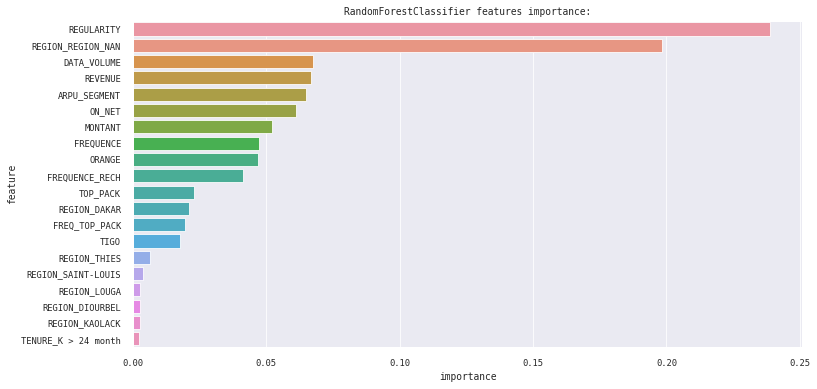

In [43]:
feature_importance_df = pd.DataFrame(rf.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(20))
plt.title('RandomForestClassifier features importance:');

#### GradientBoostingClassifier

In [44]:
# feature_importance_df = pd.DataFrame(rf.feature_importances_, columns=['importance'])
# feature_importance_df['feature'] = X.columns

# plt.figure(figsize=(12, 6));
# sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(20))
# plt.title('RandomForestClassifier features importance:');

### Predicting on the test set and Making Submission on zindi.

In [45]:
test_x = test_df.drop('CHURN', axis = 1)

In [46]:
prediction = gbm.predict_proba(test_x)[:, 1]

In [128]:
sub['CHURN'] = prediction
sub.to_csv('submission.csv', index =False)